# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. September 2022.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM

# library(funFEM)
# help("velib")   # look at the documentation there

load("velib.RData")  # direct load of data; make sure that you are in the right directory
str(velib)

Warning message in readChar(con, 5L, useBytes = TRUE):
“impossible d'ouvrir le fichier compressé 'velib.RData', cause probable : 'Aucun fichier ou dossier de ce type'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): impossible d'ouvrir la connexion


In [2]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

ERROR: Error in eval(expr, envir, enclos): objet 'velib' introuvable


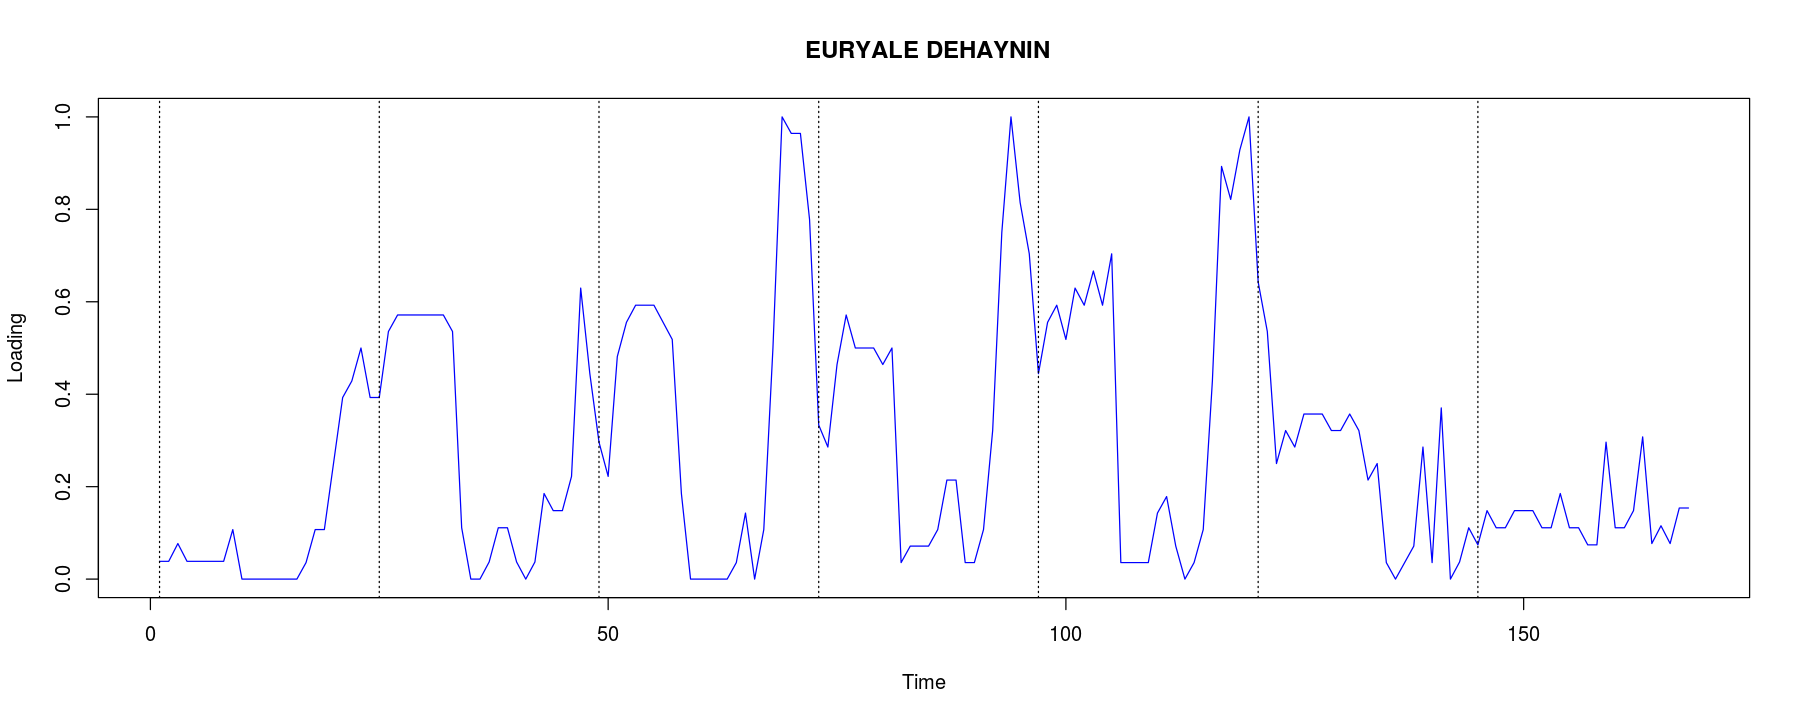

In [ ]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [ ]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing (if required, the names are contained in velib$names)
rownames(x) <- 1:nrow(x)

# Descriptive statistics.

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry? Can you see a difference between days?
3. Plot the average hourly loading for each day (on a single graph).
Comments? 
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use the package ggmap (function 'qmplot') to visualize the average loading for a given hour (6h, 12h, 23h) as a color scale.
Comments ?
5. Use a different color for stations which are located on a hill. (Use the basis 'plot' function, and the function 'qmplot' of R package ggmap).


# Principal component analysis

1. Perform a PCA with package FactoMineR. Should the data be scaled?
2. Plot the percentage of variance explained by the first 15 components, as well as a boxplot of the coordinates of the indivuals on the 15 first principal axis. How many components can be kept?
3. Plot the coordinates of the first 4 principal components on different graphs. Interpret the result (remember that the original variables are time steps).
4. Plot the circle of correlation. Interpret the result.
5. Plot the individuals on the plan spanned by the first two coordinates. Interpret the result.
6. Add the information brought by the variable qualitative variable 'bonus', indicating whether a station is located on a hill or not. In particular, where are located these stations on the graph of individuals? Is it surprising?
7. Implement questions 1-6 in Python. For that, you can have a look at the notebook on MARS, of https://github.com/wikistat/Exploration/